<a href="https://colab.research.google.com/github/bongbong31/aiffel/blob/main/deeplearning_ny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12-2 boston_housing 딥러닝 모델

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models, layers

In [3]:
# keras.datasets의 boston_housing 데이터셋을 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


### 표준화

In [5]:
# 전처리를 위해 표준화 작업
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
std = np.where(std == 0, 1, std)

train_data = train_data - mean / std
test_data = test_data - mean / std

### 딥러닝

문제 1: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일

In [6]:
# library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
# model
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001),loss = 'mean_squared_error',
              metrics = ['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# fit
epochs = 100
batch_size = 32

history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size = batch_size,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 968.8566 - mae: 25.4179 - val_loss: 219.3334 - val_mae: 10.8216
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 373.1875 - mae: 15.1697 - val_loss: 142.0128 - val_mae: 8.3248
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 237.3989 - mae: 12.1840 - val_loss: 141.6132 - val_mae: 7.9546
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 234.3495 - mae: 11.9422 - val_loss: 133.1129 - val_mae: 7.8335
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 164.9299 - mae: 10.0754 - val_loss: 132.5236 - val_mae: 7.7734
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 151.1304 - mae: 9.7430 - val_loss: 131.8711 - val_mae: 7.7763
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 184.7481 - mae: 10.4882 - val_loss: 135.2744 - val_mae: 7.9884
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 158.1282 - mae: 9.7854 - val_loss: 137.4001 - val_mae: 8.0678
Epoch 9/100
11/11 ━━━

<ipython-input-15-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


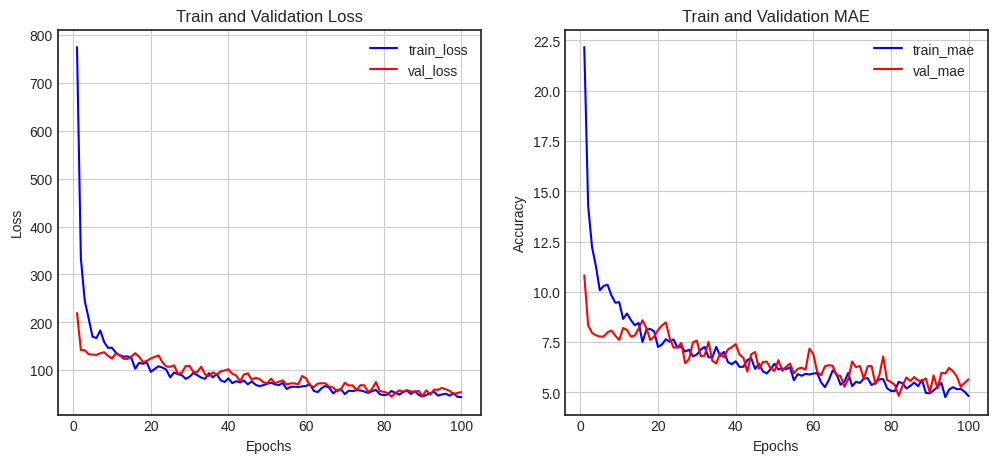

In [15]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## test 데이터 셋을 이용한 모델 평가

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
test_result:
MSE : 2234.4469
MAE : 45.1661
r2 : -25.8422


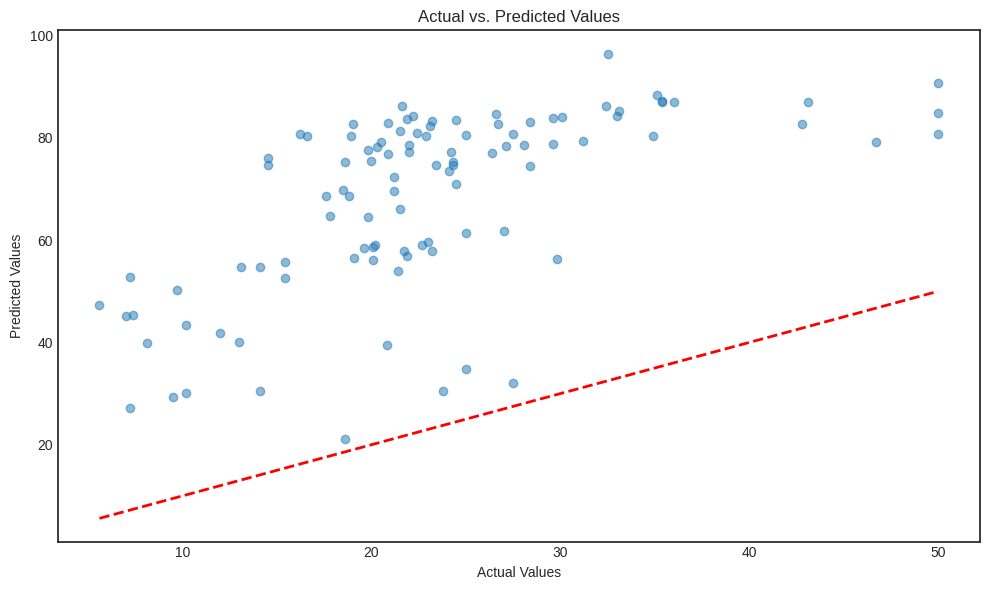

In [17]:
test_predictions = model.predict(test_data)
mse = mean_squared_error(test_labels, test_predictions)
mae = mean_absolute_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)

print('test_result:')
print(f'MSE : {mse:.4f}')
print(f'MAE : {mae:.4f}')
print(f'r2 : {r2:.4f}')

# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10,6))
plt.scatter(test_labels, test_predictions, alpha=0.5)
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.tight_layout()
plt.show()

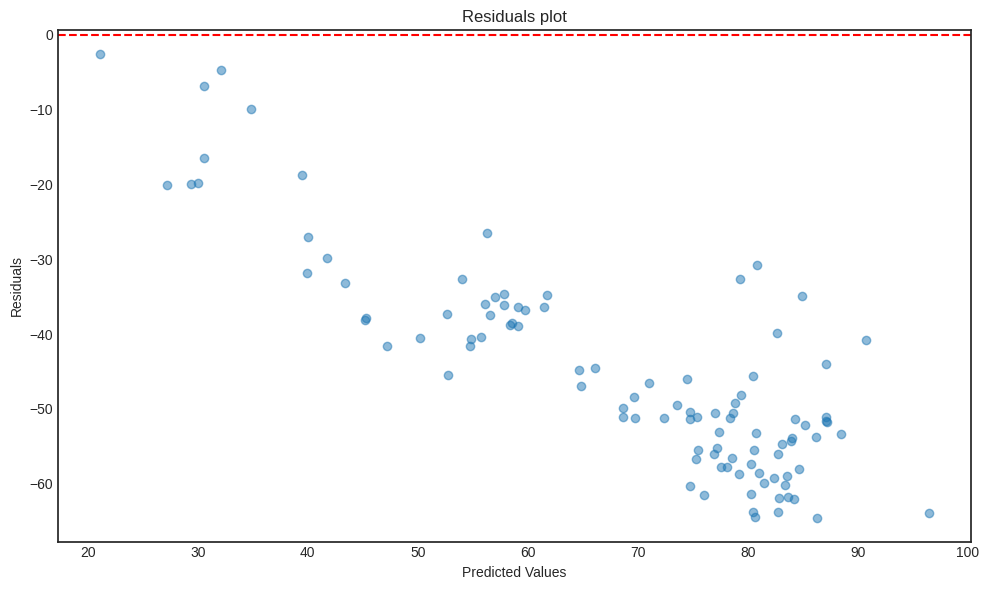

In [18]:
# 잔차 plots
residuals = test_labels - test_predictions.flatten()
plt.figure(figsize=(10,6))
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.axhline(y=0, color = 'r', linestyle='--')
plt.tight_layout()
plt.show()

# 12-3 reuters 딥러닝 모델

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [43]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [45]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, sequence in enumerate(data):
    results[i, sequence] = 1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

num_classes = max(max(train_labels), max(val_labels), max(test_labels)) + 1
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_val_labels = utils.to_categorical(val_labels)


y_train = to_categorical(train_labels, num_classes)
y_val = to_categorical(val_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

In [46]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

from tensorflow.keras.layers import BatchNormalization, Flatten

model = models.Sequential()

model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Flatten())
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 46)                  │             782 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,710 (2.46 MB)

 Trainable params: 643,582 (2.46 MB)

 Non-trainable params: 128 (512.00 B)

In [49]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 100
batch_size = 512

# callback
checkpoint = ModelCheckpoint(filepath='best_model.keras',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=20,
                               restore_best_weights=True)

history2 = model.fit(x_train, one_hot_train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, one_hot_val_labels),
                    callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0127 - loss: 4.0253
Epoch 1: val_loss improved from inf to 3.81573, saving model to best_model.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.0130 - loss: 4.0233 - val_accuracy: 0.0156 - val_loss: 3.8157
Epoch 2/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0239 - loss: 3.8645
Epoch 2: val_loss improved from 3.81573 to 3.80607, saving model to best_model.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.0246 - loss: 3.8613 - val_accuracy: 0.0499 - val_loss: 3.8061
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.0433 - loss: 3.7274
Epoch 3: val_loss improved from 3.80607 to 3.79344, saving model to best_model.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.0434 - loss: 3.7261 - val_accuracy: 0.1380 - val_loss: 3.7934
Epoch 4/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.0658 - loss: 3.6241
Epoch 4: val_loss improved from 3.79344 to 3.77710, s

모델의 오버피팅 혹은 학습 정체의 가능성 있음

<ipython-input-50-50c6327cf610>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


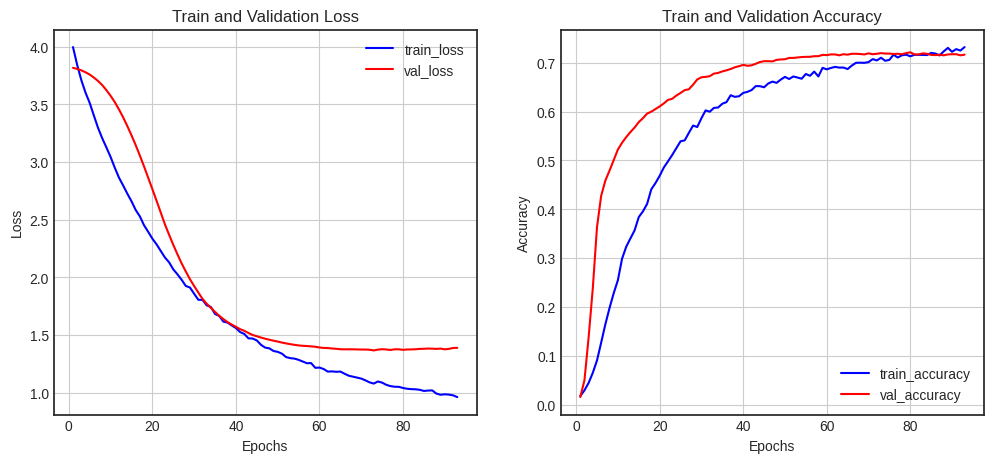

In [50]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Test accuracy : 0.7026

Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.39      0.84      0.53       105
           2       0.60      0.15      0.24        20
           3       0.89      0.94      0.91       813
           4       0.72      0.89      0.79       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.60      0.66      0.62        38
           9       0.00      0.00      0.00        25
          10       0.53      0.57      0.55        30
          11       0.42      0.72      0.53        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


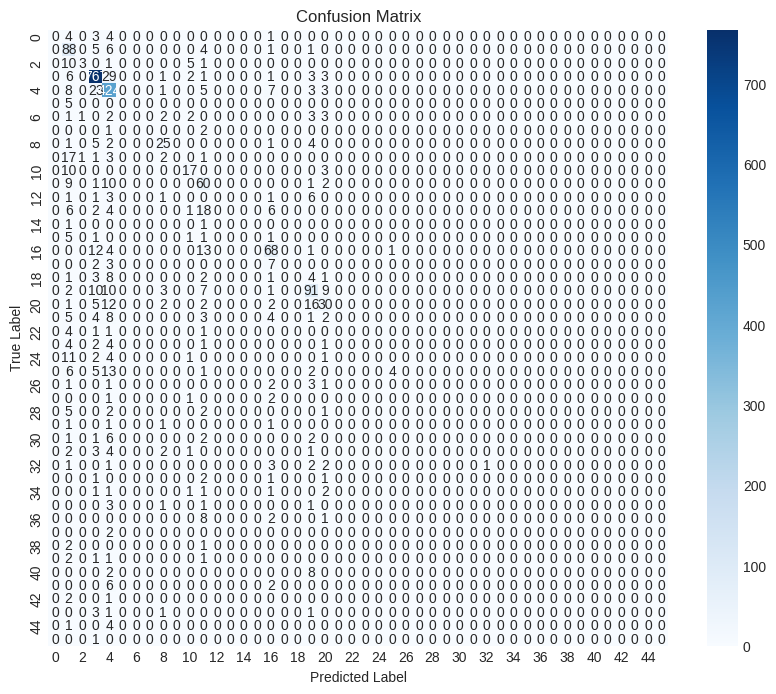

In [51]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

num_classes = 46

if len(y_test.shape) == 2 and y_test.shape[1] == num_classes:
    one_hot_test_labels = y_test
else:
    one_hot_test_labels = to_categorical(y_test, num_classes=num_classes)

# one_hot_test_labels = to_categorical(y_test, num_classes=num_classes)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(one_hot_test_labels, axis=1)

test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels, verbose=0)
print(f'Test accuracy : {test_acc:.4f}')

print('\nClassification Report: ')
print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 12-4 CIFAR10 딥러닝 모델

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

In [60]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [61]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-62-ca6bc77e9281>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


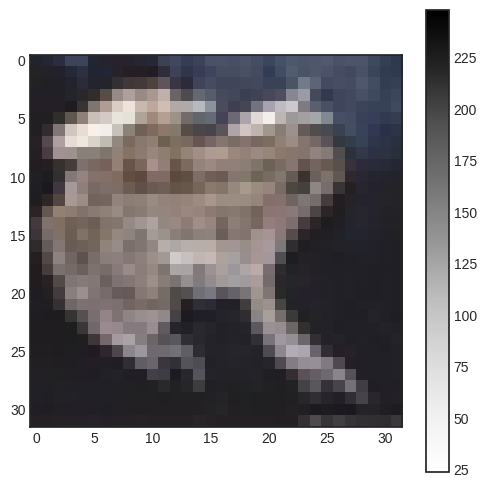

In [62]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure(figsize=(6,6))
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [63]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [64]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.

x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_val = x_val.reshape(x_val.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [65]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

문제 3-3: \
BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [67]:
model = Sequential()
model.add(layers.Conv2D(128,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 357,962 (1.37 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

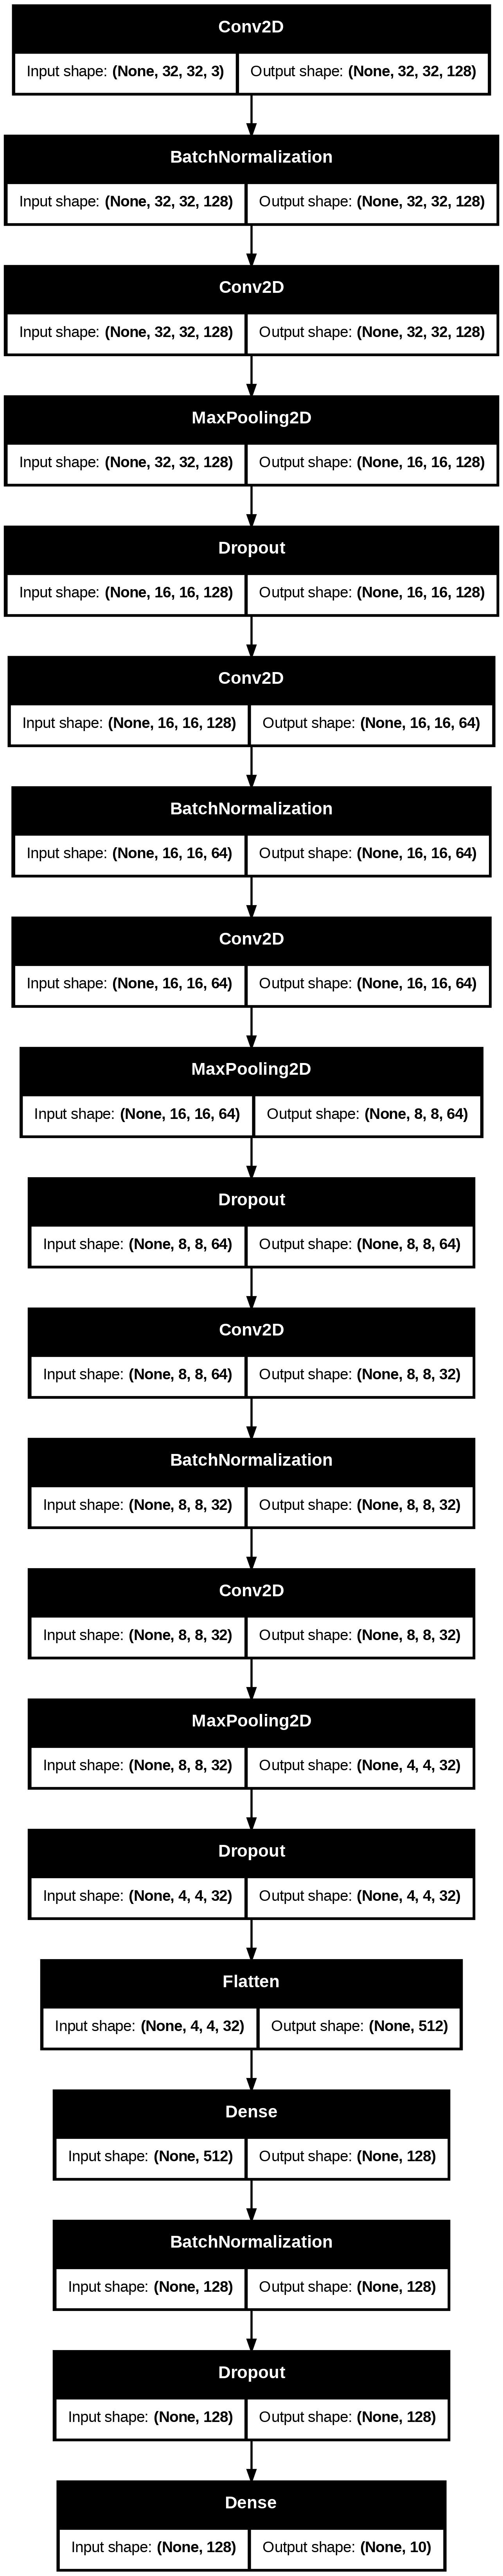

In [72]:
utils.plot_model(model, show_shapes=True)

## 모델 학습

문제 3-4: \
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_callback = ModelCheckpoint(filepath='best_model.keras',
                             save_best_only=True,
                             monitor='val_accuracy',
                             mode='max',
                             verbose=1)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# 모델 학습
batch_size = 64
epochs = 100

history3 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                     validation_data=(x_val, y_val),
                     callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/100
387/625 ━━━━━━━━━━━━━━━━━━━━ 8:24 2s/step - accuracy: 0.2809 - loss: 2.1743

In [ ]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

    # loss
    ax1.plot(history.history['loss'], label='Traning Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
plot_learning_curves(history3)

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)